<a href="https://colab.research.google.com/github/zuzanadostalova/Tutorials/blob/master/Metrics_prediction_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST dataset.

Dense layer is a linear operation in which every input is connected to every output by a weight (n_outputs weights). 

Followed by a non-linear activation function (ReLU).

Convolutional layer is a linear operation using a subset of the weights of a dense layer. Nearby inputs are connected to nearby outputs (specifically -      a convolution 755). The weights for the convolutions at each location are shared. Due to the weight sharing, there’s far less weights than in a dense layer. It is generally followed by a non-linear activation function.

Pooling layer replaces each patch in the input with a single output, which is the maximum (can also be average) of the input patch.

Normalization layer scale the input so that the output has near to a zero mean and unit standard deviation, to allow for faster and more resilient training.

If you change the architecture of your model, restart the runtime. Otherwise, you are running the old architecture.

# Import the libraries, add the names of your classes, and observe the format of your data.

> I. Import tensorflow and helper libraries.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Print a version of tensorflow.
print(tf.__version__)

2.2.0-rc3


> Import metrics.

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

> II. Import MNIST dataset.

In [3]:
# Loading the dataset returns four Numpy arrays.
# Imagaes are 28x28 NumPy arrays, pixels 0-255, labels are an array of integers
# 0-9.
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


> III. Class names are not included in the dataset, add them for later use when plotting images.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

> IV. Format of the dataset:

In [5]:
# There are 60000 images in the training set represented as 28x28 pixels.
train_images.shape

(60000, 28, 28)

In [6]:
# There are 60000 labels in the training set.
len(train_labels)

60000

In [7]:
# Each label is an integer 0-9.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# In the test set, there are 10000  represented as 28x28 pixels.
test_images.shape

(10000, 28, 28)

In [9]:
# There are 10000 labels in the training set.
len(test_labels)

10000

In [10]:
# Each label is an integer 0-9.
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Preprocess the data.

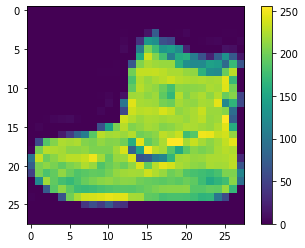

In [11]:
# The first image in the training set is repsented by 0-255 pixels, however,
# that cannot be input for your model.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

> I. Scale them to a range of 0 to 1 before loading them to the neural network model.

In [0]:
# Training and testing set have to be preprocessed in the same way.
train_images = train_images / 255
test_images = test_images / 255

> II. To verify the data before building NN, display the first 25 images.

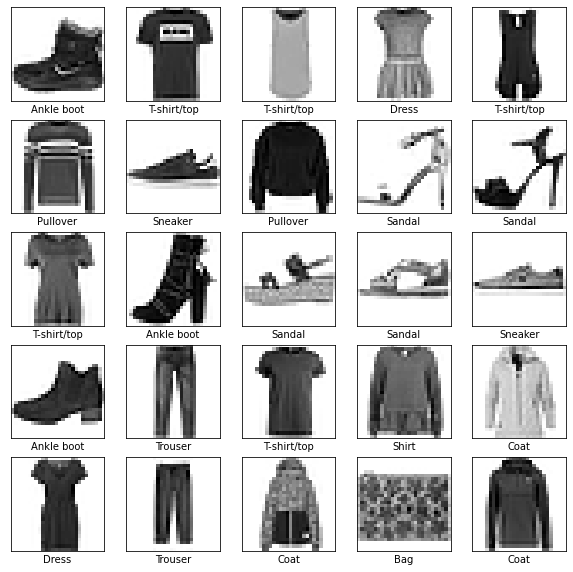

In [13]:
plt.figure(figsize=(10,10))
# 25 images.
for i in range(25):
  # In 5 columns, 5 rows.
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # Color map, optional parameter.
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

> III. Resize the training and testing images feed them in the convolution layer.

In [14]:
# Take all of the 60000 images, 28x28 pixels, one column.
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)
input_shape = (28,28,1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print('x_train shape:', train_images.shape)
print('Number of images in x_train', train_images.shape[0])
print('Number of images in x_test', test_images.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


> IV. Split train data into train set and validation set.

In [0]:
from sklearn.model_selection import train_test_split
train_images,validation_images,train_labels,validation_labels= train_test_split(train_images,train_labels,test_size=.25,random_state=0)

# Build the model.

I. Set up the layers.

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianDropout, MaxPooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization

model = Sequential([
                    # First set of convolution layer, max pooling, batch normalization, and dropout.
                      Conv2D(6, kernel_size=(3,3), input_shape=input_shape, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None),
                      LeakyReLU(alpha=0.3),
                      MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
                      BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                      GaussianDropout(0.2),
  
                    # Second set of convolution layer, max pooling, batch normalization, and dropout.
                      Conv2D(12, kernel_size=(3,3), input_shape=input_shape, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None),
                      LeakyReLU(alpha=0.3),
                      MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
                      BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                      GaussianDropout(0.2),
                     
                    # Third set of convolution layer, max pooling, batch normalization, and dropout.
                      Conv2D(28, kernel_size=(3,3), input_shape=input_shape, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None),
                      LeakyReLU(alpha=0.3),
                      MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
                      BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                      GaussianDropout(0.2),
              
                    # Flatten layer is unstacking rows of pixels in the 
                    # image and lining them up - 784 pixels. 
                      Flatten(),

                    # The first Dense layer has 256 nodes (or neurons). The arbitrary succeeding layers would have 
                    # gradually smaller number of neurons - they contain the half of the neurons of
                    # the previous layers to become more and more specialised for feature recognition.
                    # Set of dense layer, batch normalization, and dropout.
                      Dense(256, activation='relu'),
                      BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                      GaussianDropout(0.2),
                    
                    # The second Dense layer has 128 nodes (or neurons). The arbitrary succeeding layers would have 
                    # gradually smaller number of neurons - they contain the half of the neurons of
                    # the previous layers to become more and more specialised for feature recognition.
                    # Set of dense layer, batch normalization, and dropout.
                      Dense(128, activation='relu'),
                      BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                      GaussianDropout(0.2),
                    
                    # The third Dense layer has 64 nodes (or neurons). The arbitrary succeeding layers would have 
                    # gradually smaller number of neurons - they contain the half of the neurons of
                    # the previous layers to become more and more specialised for feature recognition.
                    # Set of dense layer, batch normalization, and dropout.
                      Dense(64, activation='relu'),
                      BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                      GaussianDropout(0.2),
                    
                    # The last layer returns a logits array with length of 10. Each node contains a score 
                    # indicating the current image belongs to one of the 10 classes. Dense = fully connected 
                    # layer. The more neurons you have, the more features they can recognise.
                    # Final layer with 10 neurons - in your case you have to classify samples into 10 classes.
                      Dense(10) 
])

II. Compile the model.

In [0]:
# Loss function measures how accurate the model is during training. 
# You want to minimize this function to "steer" the model in the right direction.
# Optimizer is how the model is updated based on the data it sees and its 
# loss function.
# Metrics are used to monitor the training and testing steps. The following example 
# uses accuracy, the fraction of the images that are correctly classified.
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

III. Train the model.

A) Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
callbacks = [
 # Interrupt training if `val_loss` stops improving for over 2 epochs
 EarlyStopping(patience=2, monitor='val_loss'),
 # Write TensorBoard logs to `./logs` directory
 TensorBoard(log_dir='./logs')]
model.fit(train_images, train_labels, epochs=18, callbacks=callbacks,validation_data=(validation_images,validation_labels))
# A callback is a set of functions to be applied at given stages of the training 
# procedure. You can use callbacks to get a view on internal states 
# and statistics of the model during training. 

Epoch 1/18
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9472 - accuracy: 0.6638 - val_loss: 0.6097 - val_accuracy: 0.7777
Epoch 2/18
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7089 - accuracy: 0.7430 - val_loss: 0.5632 - val_accuracy: 0.7917
Epoch 3/18
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6486 - accuracy: 0.7681 - val_loss: 0.5029 - val_accuracy: 0.8147
Epoch 4/18
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6233 - accuracy: 0.7751 - val_loss: 0.4940 - val_accuracy: 0.8175
Epoch 5/18
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5988 - accuracy: 0.7848 - val_loss: 0.4828 - val_accuracy: 0.8188
Epoch 6/18
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5872 - accuracy: 0.7913 - val_loss: 0.4598 - val_accuracy: 0.8281
Epoch 7/18
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5736 - accuracy: 0.7944 - val_loss: 0.4580 - val_ac

B) Evaluate accuracy of the model on test dataset.

In [19]:
# verbose=2 will just mention the number of epoch.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

# It turns out that the accuracy on the test dataset is a little less than 
# the accuracy on the training dataset. This gap between training accuracy 
# and test accuracy represents overfitting. Overfitting happens when 
# a machine learning model performs worse on new, previously unseen inputs 
# than it does on the training data. An overfitted model "memorizes" the noise 
# and details in the training dataset to a point where it negatively impacts
# the performance of the model on the new data.

313/313 - 1s - loss: 0.4371 - accuracy: 0.8401

Test accuracy 0.8400999903678894


C) Make predictions.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Softmax
probability_model = Sequential([model, Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [22]:
# Array of 10 numbers representing the confidence that the image corresponds
# the 10 different articles of clothing.
predictions[0]

array([1.9638092e-05, 1.6080897e-06, 5.4449138e-06, 5.1852376e-06,
       4.3036189e-06, 1.4022030e-03, 2.9705083e-05, 2.4890186e-02,
       2.8336355e-05, 9.7361338e-01], dtype=float32)

In [23]:
# Which label has the highest confidence?
np.argmax(predictions[0])
# This label is for ankle boot, or class_names[9].

9

In [24]:
# Check if the model is correct.
test_labels[0]

9

# Evaluate the predictions.

I. Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

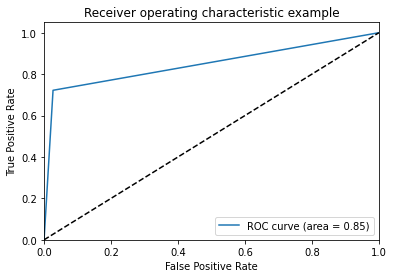

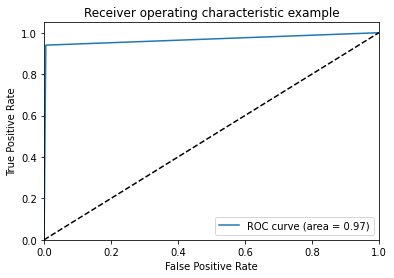

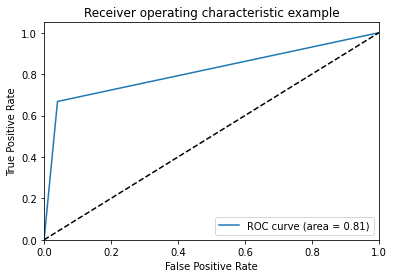

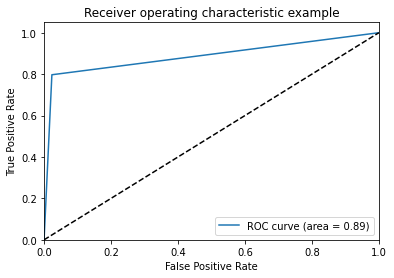

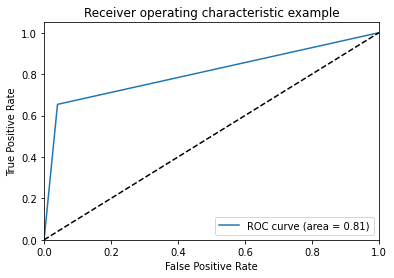

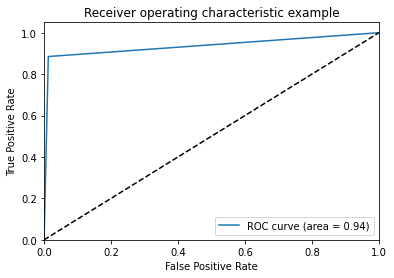

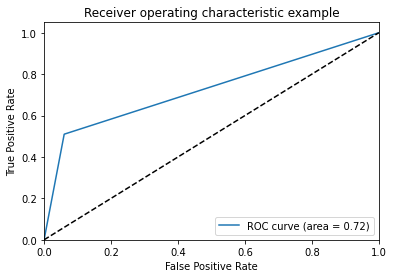

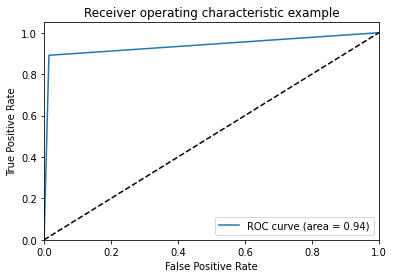

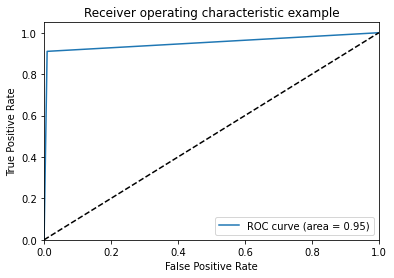

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

# Download the train and test images.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images_f = train_images.reshape((60000,784))
test_images_f = test_images.reshape((10000,784))

# Binarize the output
train_labels_f = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_f = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = 9

classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score = classifier.fit(train_images_f, train_labels_f).predict_proba(test_images_f)

# False positive rate.
fpr = dict()
# True positive rate.
tpr = dict()
roc_auc = dict()

# Count ROC AUC for each class.
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_f [:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class.
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ROC AUC score for all 9 classes.

In [0]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [28]:
multiclass_roc_auc_score(test_labels, rounded_predictions, average="macro")

0.873388888888889

II. Create confusion matrix.

In [0]:
# Import libraries we are going to need.
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
# Count rounded_predictions.
rounded_predictions = np.argmax(model.predict(x=test_images), axis=-1)

In [0]:
# Create confusion matrix.
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [32]:
cm

array([[709,   0,  65,  93,  88,   3,  38,   0,   4,   0],
       [  1, 956,   4,  20,  16,   1,   1,   0,   1,   0],
       [  7,   0, 579,  11, 397,   0,   5,   0,   1,   0],
       [  9,  15,  32, 843,  92,   3,   1,   0,   5,   0],
       [  0,   0,  45,  24, 924,   0,   1,   0,   6,   0],
       [  0,   0,   0,   2,   1, 981,   0,   7,   1,   8],
       [142,   3, 131,  51, 530,   0, 130,   0,  13,   0],
       [  0,   0,   0,   0,   0, 186,   0, 771,   0,  43],
       [  3,   2,  13,   2,  37,  17,   3,   1, 922,   0],
       [  0,   1,   0,   1,   1,  30,   0,  60,   1, 906]])

Plot confusion matrix.

In [0]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[709   0  65  93  88   3  38   0   4   0]
 [  1 956   4  20  16   1   1   0   1   0]
 [  7   0 579  11 397   0   5   0   1   0]
 [  9  15  32 843  92   3   1   0   5   0]
 [  0   0  45  24 924   0   1   0   6   0]
 [  0   0   0   2   1 981   0   7   1   8]
 [142   3 131  51 530   0 130   0  13   0]
 [  0   0   0   0   0 186   0 771   0  43]
 [  3   2  13   2  37  17   3   1 922   0]
 [  0   1   0   1   1  30   0  60   1 906]]


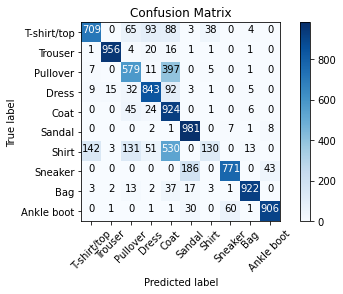

In [34]:
plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix')

# Create a plot to see the predictions for all of classes 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape((28,28)), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Verify predictions about arbitrary images.

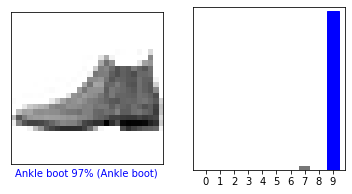

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

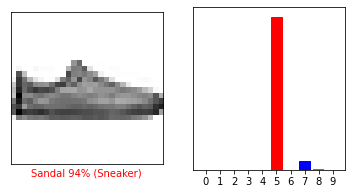

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

# Plot images with their predictions.

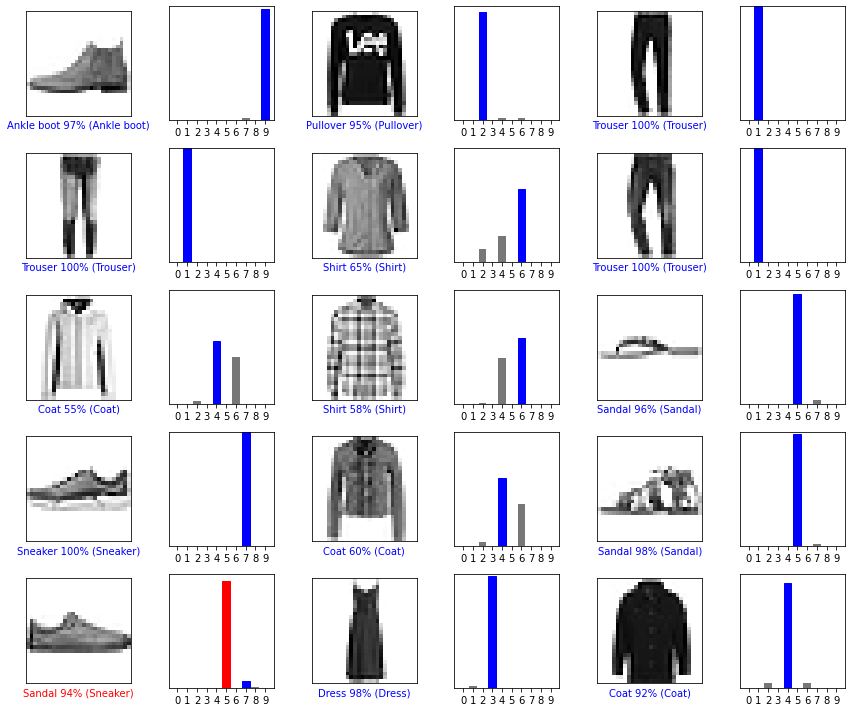

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use trained model to predict a single image.

In [39]:
img = test_images[1]
print(img.shape)

(28, 28, 1)


In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28, 1)


In [41]:
# Predict the correct label for the image.
predictions_single = probability_model.predict(img)
print(predictions_single)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


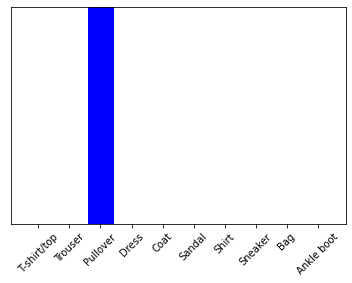

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
# Returns a list of lists—one list for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])

2